Ironhack DAPT Jan 2024 - Mid-project


Historical] Restaurant Inspection Scores (2016-2019)


Group' Hunge'



Authors: Shakt



Dataset:Restaurant Inspection Scoress https://data.sfgov.org/Health-and-Social-Services/-Historical-Restaurant-Inspection-Scores-2016-2019/pyih-qa8i/about_data?row_index=0s)


In [1]:
# Import all dependencies 

from mysql.connector import connect 
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns#
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset 
df = pd.read_csv("_Historical__Restaurant_Inspection_Scores__2016-2019__20240401.csv")
df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,85936_20170925,09/25/2017 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,5827_20170224,02/24/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,94910_20180530,05/30/2018 12:00:00 AM,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,64667_20170814,08/14/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,97722_20181217,12/17/2018 12:00:00 AM,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109,NaN,NaN,NaN,1.415530e+10,70220_20170913,09/13/2017 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117,NaN,NaN,NaN,1.415584e+10,95021_20190228,02/28/2019 12:00:00 AM,92.0,Routine - Unscheduled,95021_20190228_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124,NaN,NaN,NaN,NaN,78289_20161209,12/09/2016 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133,NaN,NaN,NaN,1.415582e+10,100887_20190814,08/14/2019 12:00:00 AM,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename the column

In [3]:
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

Basic understanding of the dataset

Nans, features, data types, basic stats, head.

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  object 
 1   business_name                 51901 non-null  object 
 2   business_address              51901 non-null  object 
 3   business_city                 51901 non-null  object 
 4   business_state                51901 non-null  object 
 5   business_postal_code          50761 non-null  object 
 6   business_latitude             26573 non-null  float64
 7   business_longitude            26573 non-null  float64
 8   business_location             26558 non-null  object 
 9   business_phone_number         17241 non-null  float64
 10  inspection_id                 51901 non-null  object 
 11  inspection_date               51901 non-null  object 
 12  inspection_score              38078 non-null  float64
 13  i

In [5]:
# Check the features 

df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'neighborhoods', 'sf_find_neighborhoods',
       'current_police_districts', 'current_supervisor_districts',
       'analysis_neighborhoods'],
      dtype='object')

In [6]:
# Check the data types 

df.dtypes

business_id                      object
business_name                    object
business_address                 object
business_city                    object
business_state                   object
business_postal_code             object
business_latitude               float64
business_longitude              float64
business_location                object
business_phone_number           float64
inspection_id                    object
inspection_date                  object
inspection_score                float64
inspection_type                  object
violation_id                     object
violation_description            object
risk_category                    object
neighborhoods                   float64
sf_find_neighborhoods           float64
current_police_districts        float64
current_supervisor_districts    float64
analysis_neighborhoods          float64
dtype: object

In [7]:
# Check basic stats

df.describe()

,business_latitude,business_longitude,business_phone_number,inspection_score,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods
count,26573.000000,26573.000000,1.724100e+04,38078.000000,26533.00000,26533.00000,26545.000000,26545.000000,26545.000000
mean,37.749975,-122.358242,1.415542e+10,86.157624,56.88226,56.88226,5.369184,5.628329,19.509135
std,0.897474,2.908100,1.356890e+06,8.481331,34.70851,34.70851,2.703014,3.294407,11.599060
min,0.000000,-122.510896,1.415020e+10,45.000000,1.00000,1.00000,1.000000,1.000000,1.000000
25%,37.755282,-122.437550,1.415537e+10,81.000000,29.00000,29.00000,3.000000,3.000000,8.000000
50%,37.779847,-122.419308,1.415561e+10,87.000000,53.00000,53.00000,6.000000,5.000000,20.000000
75%,37.788773,-122.407563,1.415580e+10,92.000000,94.00000,94.00000,8.000000,9.000000,30.000000
max,37.824494,0.000000,1.415988e+10,100.000000,117.00000,117.00000,10.000000,11.000000,41.000000


In [8]:
df.isna().sum()

business_id                         0
business_name                    2072
business_address                 2072
business_city                    2072
business_state                   2072
business_postal_code             3212
business_latitude               27400
business_longitude              27400
business_location               27415
business_phone_number           36732
inspection_id                    2072
inspection_date                  2072
inspection_score                15895
inspection_type                  2072
violation_id                    15159
violation_description           15159
risk_category                   15159
neighborhoods                   27440
sf_find_neighborhoods           27440
current_police_districts        27428
current_supervisor_districts    27428
analysis_neighborhoods          27428
dtype: int64

Isolate the numeric and categorical variables

In [9]:
df_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
df_numerics_only

['business_latitude',
 'business_longitude',
 'business_phone_number',
 'inspection_score',
 'neighborhoods',
 'sf_find_neighborhoods',
 'current_police_districts',
 'current_supervisor_districts',
 'analysis_neighborhoods']

In [10]:
df_Catogorical=df.select_dtypes(include=['object']).columns.tolist()
df_Catogorical

['business_id',
 'business_name',
 'business_address',
 'business_city',
 'business_state',
 'business_postal_code',
 'business_location',
 'inspection_id',
 'inspection_date',
 'inspection_type',
 'violation_id',
 'violation_description',
 'risk_category']

In [11]:
# Check for duplicates > NO DUPLICATES!!!
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53968    False
53969    False
53970    False
53971    False
53972    False
Length: 53973, dtype: bool

Using New Methods to clean Data

In [12]:

# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

business_id - 0%
business_name - 4%
business_address - 4%
business_city - 4%
business_state - 4%
business_postal_code - 6%
business_latitude - 51%
business_longitude - 51%
business_location - 51%
business_phone_number - 68%
inspection_id - 4%
inspection_date - 4%
inspection_score - 29%
inspection_type - 4%
violation_id - 28%
violation_description - 28%
risk_category - 28%
neighborhoods - 51%
sf_find_neighborhoods - 51%
current_police_districts - 51%
current_supervisor_districts - 51%
analysis_neighborhoods - 51%


For First Fase, I am replacing the Naan, Simple Cleaning.

I will Drop
business_latitude         
business_longitude
Because I will not need this for my whole Process.

In [13]:
df.drop(["business_latitude"], axis=1 , inplace=True)
df.drop(["business_longitude"], axis=1 , inplace=True)

I will do first simple cleaning so that i will drop remaing naans value or replace it with 0 according to there value ,
first i will count there value 

My Target will Be the Inspection Score, Inspection type, business City, and Inspection Date.

In [14]:
df['business_location'].value_counts()

business_location
POINT (-122.410189 37.80824)     207
POINT (-122.406761 37.774722)    139
POINT (-122.407563 37.784317)    138
POINT (-122.48591 37.758941)     133
POINT (-122.39377 37.795225)     130
                                ... 
POINT (-122.438217 37.800534)      1
POINT (-122.400714 37.795428)      1
POINT (-122.392489 37.777803)      1
POINT (-122.370584 37.816422)      1
POINT (-122.433625 37.804444)      1
Name: count, Length: 2310, dtype: int64

So i will Drop it No need'business_location'

In [15]:
df['violation_id'].value_counts()

violation_id
86393_20180516_103162    3
65012_20171107_103157    2
94187_20190726_103119    2
2659_20180327_103124     2
87492_20161208_103124    2
                        ..
1542_20190402_103150     1
37731_20190314_103161    1
7772_20190108_103131     1
7405_20181004_103129     1
95021_20190228_103119    1
Name: count, Length: 38771, dtype: int64

Its it so it will also not use for further I will drop 'violation_id'

In [16]:
df['violation_description'].value_counts()


violation_description
Unclean or degraded floors walls or ceilings                    3326
Unapproved or unmaintained equipment or utensils                2822
Inadequately cleaned or sanitized food contact surfaces         2720
Inadequate and inaccessible handwashing facilities              2635
Moderate risk food holding temperature                          2530
                                                                ... 
Improperly displayed mobile food permit or signage                 5
Improper cooking time or temperatures                              5
Mobile food facility stored in unapproved location                 4
Noncompliance with Gulf Coast oyster regulation                    4
No restroom facility within 200 feet of mobile food facility       1
Name: count, Length: 65, dtype: int64

In [17]:
df['risk_category'].value_counts()

risk_category
Low Risk         18398
Moderate Risk    14766
High Risk         5650
Name: count, dtype: int64

In [18]:
df['current_police_districts'].value_counts()

current_police_districts
6.0     5570
3.0     4147
4.0     3710
8.0     2529
1.0     2402
10.0    2338
9.0     2320
5.0     1494
2.0     1357
7.0      678
Name: count, dtype: int64

So according to all these results all needed 
column will replace it naan with some String and all not needed column will be
dropdown.
    -['business_location'] - Drop
    -['violation_id']- Drop 
    -['violation_description']- no value will be replace as No Description
    -['risk_category']- No value will a be replaced as No category
    -['current_police_districts']- Missing value Replace as missing district.

In [19]:
df.drop(['business_location'], axis=1, inplace=True)
df.drop(["violation_id"], axis=1 , inplace=True)


In [20]:
if 'current_police_districts' in df.columns:
    df['current_police_districts'].fillna('Missing district', inplace=True)

In [21]:
if 'violation_description' in df.columns:
    df['violation_description'].fillna('Missing description', inplace=True)

In [22]:
if 'risk_category' in df.columns:
    df['risk_category'].fillna('No risk category', inplace=True)

In [23]:
df.isna().sum()

business_id                         0
business_name                    2072
business_address                 2072
business_city                    2072
business_state                   2072
business_postal_code             3212
business_phone_number           36732
inspection_id                    2072
inspection_date                  2072
inspection_score                15895
inspection_type                  2072
violation_description               0
risk_category                       0
neighborhoods                   27440
sf_find_neighborhoods           27440
current_police_districts            0
current_supervisor_districts    27428
analysis_neighborhoods          27428
dtype: int64

In [24]:
df['business_postal_code'] = pd.to_numeric(df['business_postal_code'], errors='coerce')
df['business_postal_code'].fillna(df['business_postal_code'].mean(), inplace=True)
df['business_phone_number'].fillna(df['business_phone_number'].mean(), inplace=True)
df['inspection_score'].fillna(df['inspection_score'].mean(), inplace=True)
df['neighborhoods'].fillna(df['neighborhoods'].mean(), inplace=True)
df['sf_find_neighborhoods'].fillna(df['sf_find_neighborhoods'].mean(), inplace=True)
df['current_supervisor_districts'].fillna(df['current_supervisor_districts'].mean(), inplace=True)
df['analysis_neighborhoods'].fillna(df['analysis_neighborhoods'].mean(), inplace=True)

In [25]:
df.isna().sum()

business_id                        0
business_name                   2072
business_address                2072
business_city                   2072
business_state                  2072
business_postal_code               0
business_phone_number              0
inspection_id                   2072
inspection_date                 2072
inspection_score                   0
inspection_type                 2072
violation_description              0
risk_category                      0
neighborhoods                      0
sf_find_neighborhoods              0
current_police_districts           0
current_supervisor_districts       0
analysis_neighborhoods             0
dtype: int64

In [26]:

numeric_columns = df.select_dtypes(include=np.number).columns
non_numeric_columns = df.select_dtypes(exclude=np.number).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values in non-numeric columns with 'Missing' or appropriate placeholders
df[non_numeric_columns] = df[non_numeric_columns].fillna('Missing')

# Check remaining NaN values
df.isna().sum()




business_id                     0
business_name                   0
business_address                0
business_city                   0
business_state                  0
business_postal_code            0
business_phone_number           0
inspection_id                   0
inspection_date                 0
inspection_score                0
inspection_type                 0
violation_description           0
risk_category                   0
neighborhoods                   0
sf_find_neighborhoods           0
current_police_districts        0
current_supervisor_districts    0
analysis_neighborhoods          0
dtype: int64

In [27]:
df['inspection_score'].value_counts()

inspection_score
86.157624     15895
90.000000      3578
92.000000      3280
94.000000      2635
88.000000      2507
96.000000      2275
86.000000      2148
100.000000     1870
85.000000      1649
87.000000      1585
83.000000      1544
81.000000      1393
84.000000      1281
82.000000      1059
98.000000      1029
80.000000       961
79.000000       955
89.000000       897
78.000000       779
77.000000       751
75.000000       704
74.000000       621
76.000000       588
91.000000       515
72.000000       494
73.000000       445
71.000000       373
70.000000       342
93.000000       265
68.000000       222
69.000000       216
65.000000       206
67.000000       189
66.000000       129
64.000000       122
63.000000        90
62.000000        62
60.000000        62
59.000000        47
61.000000        45
58.000000        36
55.000000        36
57.000000        33
48.000000        14
46.000000        12
51.000000        12
45.000000        12
54.000000        10
Name: count, dtype: int

Solution: Make Food Score Range

Make ranges that display how muchyou needt, to understand how good isthe restaurantr
 The function advisor will givehow many stars they deservet.aod Star'

In [28]:
df["inspection_score"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 59.99:
        return "Under Rating!"
    elif 60 <= inspection_score <= 69.99:
        return "Two Star"
    elif 70 <= inspection_score <= 79.99:
        return "Three Star"
    elif 80 <= inspection_score <= 89.99:
        return "Four Star"
    elif 90 <= inspection_score <= 94.99:
        return "Four and Half Star"
    else:
        return "Five Star Plus!"

df["food_rating"] = df["inspection_score"].apply(lambda x : advisor (x))
df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,food_rating
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108.0,1.415578e+10,85936_20170925,09/25/2017 12:00:00 AM,100.000000,Routine - Unscheduled,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134.0,1.415546e+10,5827_20170224,02/24/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,92.00000,92.00000,2.0,2.000000,7.000000,Four Star
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109.0,1.415542e+10,94910_20180530,05/30/2018 12:00:00 AM,86.157624,New Ownership - Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110.0,1.415542e+10,64667_20170814,08/14/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,53.00000,53.00000,3.0,2.000000,20.000000,Four Star
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133.0,1.415542e+10,97722_20181217,12/17/2018 12:00:00 AM,96.000000,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109.0,1.415530e+10,70220_20170913,09/13/2017 12:00:00 AM,86.157624,Complaint,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117.0,1.415584e+10,95021_20190228,02/28/2019 12:00:00 AM,92.000000,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,56.88226,56.88226,Missing district,5.628329,19.509135,Four and Half Star
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124.0,1.415542e+10,78289_20161209,12/09/2016 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133.0,1.415582e+10,100887_20190814,08/14/2019 12:00:00 AM,86.157624,New Ownership - Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star


Let's Get a Responce Assuming "Yes" or "No"


In [29]:
df["inspection_score"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 60:
        return "No"
    else:
        return "Yes"

df["responce_result"] = df["inspection_score"].apply(lambda x : advisor (x))
df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,food_rating,responce_result
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108.0,1.415578e+10,85936_20170925,09/25/2017 12:00:00 AM,100.000000,Routine - Unscheduled,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!,Yes
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134.0,1.415546e+10,5827_20170224,02/24/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,92.00000,92.00000,2.0,2.000000,7.000000,Four Star,Yes
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109.0,1.415542e+10,94910_20180530,05/30/2018 12:00:00 AM,86.157624,New Ownership - Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110.0,1.415542e+10,64667_20170814,08/14/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,53.00000,53.00000,3.0,2.000000,20.000000,Four Star,Yes
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133.0,1.415542e+10,97722_20181217,12/17/2018 12:00:00 AM,96.000000,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109.0,1.415530e+10,70220_20170913,09/13/2017 12:00:00 AM,86.157624,Complaint,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117.0,1.415584e+10,95021_20190228,02/28/2019 12:00:00 AM,92.000000,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,56.88226,56.88226,Missing district,5.628329,19.509135,Four and Half Star,Yes
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124.0,1.415542e+10,78289_20161209,12/09/2016 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133.0,1.415582e+10,100887_20190814,08/14/2019 12:00:00 AM,86.157624,New Ownership - Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes


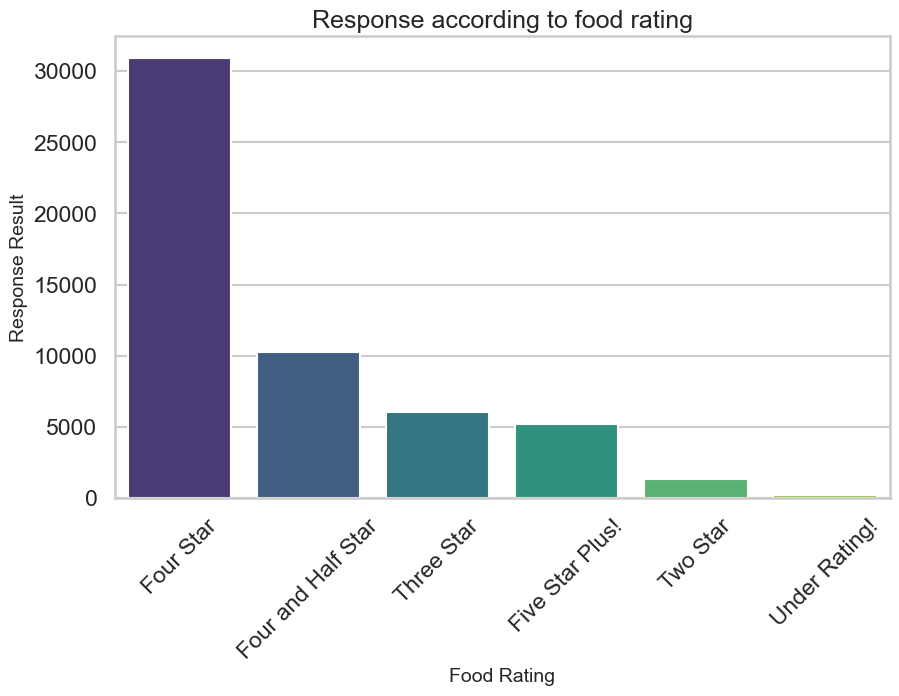

In [30]:

# Calculate the frequency of each category in 'food_rating'
order = df['food_rating'].value_counts().index

df_sorted = df.groupby('food_rating').size().reset_index(name='count').sort_values(by='count', ascending=False)


sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='food_rating', palette='viridis', order=df_sorted['food_rating'])

plt.title('Response according to food rating', fontsize=18)
plt.xlabel('Food Rating', fontsize=14)
plt.ylabel('Response Result', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.show()



<Axes: xlabel='responce_result', ylabel='count'>

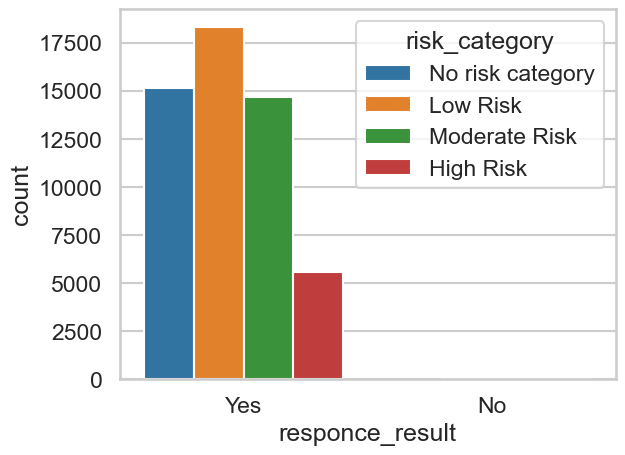

In [31]:
sns.countplot(x="responce_result", hue="risk_category" , data = df)

In [32]:
df["food_rating"].value_counts()

food_rating
Four Star             30919
Four and Half Star    10273
Three Star             6052
Five Star Plus!        5174
Two Star               1343
Under Rating!           212
Name: count, dtype: int64

In [33]:
#Maximum Score got

df['inspection_score'].nlargest(n=1)

0    100.0
Name: inspection_score, dtype: float64

In [34]:
##min Score got


df.inspection_score.min()

45.0

In [35]:
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_description', 'risk_category',
       'neighborhoods', 'sf_find_neighborhoods', 'current_police_districts',
       'current_supervisor_districts', 'analysis_neighborhoods', 'food_rating',
       'responce_result'],
      dtype='object')

Group by Top Five High Scorer

In [36]:
df.loc[df.groupby(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_phone_number',
       'inspection_id', 'inspection_date','inspection_type', 'violation_description', 'risk_category',
       'neighborhoods', 'sf_find_neighborhoods', 'current_police_districts',
       'current_supervisor_districts', 'analysis_neighborhoods', 'food_rating',
       'responce_result'] )['inspection_score'] .idxmax()].head(5)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,food_rating,responce_result
42760,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110.0,1.415542e+10,1000_20161006,10/06/2016 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,53.0,53.0,3.0,2.0,20.0,Four Star,Yes
9038,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110.0,1.415542e+10,1000_20171002,10/02/2017 12:00:00 AM,74.000000,Routine - Unscheduled,High risk food holding temperature,High Risk,53.0,53.0,3.0,2.0,20.0,Three Star,Yes
12273,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110.0,1.415542e+10,1000_20171002,10/02/2017 12:00:00 AM,74.000000,Routine - Unscheduled,Improper food storage,Low Risk,53.0,53.0,3.0,2.0,20.0,Three Star,Yes
5511,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110.0,1.415542e+10,1000_20171002,10/02/2017 12:00:00 AM,74.000000,Routine - Unscheduled,Improper thawing methods,Moderate Risk,53.0,53.0,3.0,2.0,20.0,Three Star,Yes
16635,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110.0,1.415542e+10,1000_20171002,10/02/2017 12:00:00 AM,74.000000,Routine - Unscheduled,Low risk vermin infestation,Low Risk,53.0,53.0,3.0,2.0,20.0,Three Star,Yes


In [37]:
df.loc[df.groupby(['business_city'])['inspection_score'].idxmax()].head(1)


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,food_rating,responce_result
8,"90840,Steep Creamery & Tea,""270 Brannan St., S...",Missing,Missing,Missing,Missing,316729.410119,1.415542e+10,Missing,Missing,86.157624,Missing,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes


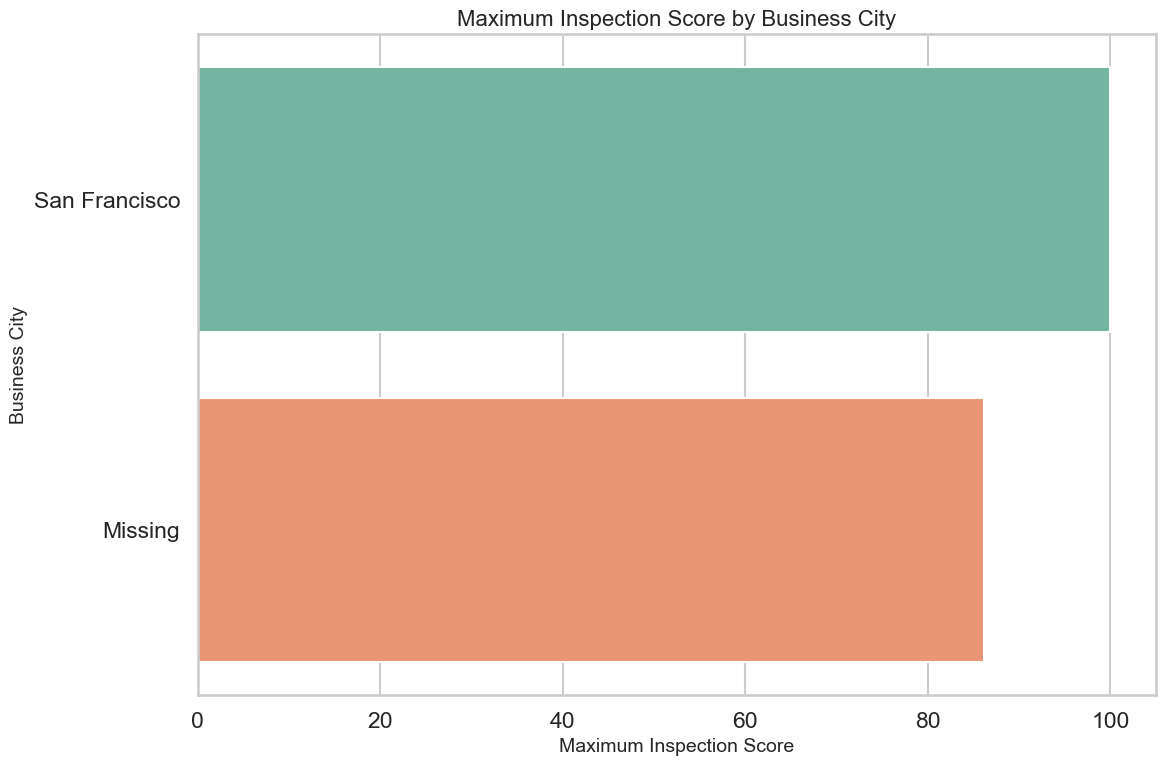

In [38]:
##Group By City with High Score
# Selecting rows with maximum inspection score for each business city
max_inspection_scores = df.loc[df.groupby('business_city')['inspection_score'].idxmax()]

# Sorting the data by inspection score
max_inspection_scores = max_inspection_scores.sort_values(by='inspection_score', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='inspection_score', y='business_city', data=max_inspection_scores, palette='Set2')
plt.title('Maximum Inspection Score by Business City', fontsize=16)
plt.xlabel('Maximum Inspection Score', fontsize=14)
plt.ylabel('Business City', fontsize=14)
plt.tight_layout()
plt.show()




In [39]:
df.loc[df.groupby(['inspection_date'])['inspection_score'].idxmin()].head(1)


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,food_rating,responce_result
9775,5297,EL NORTEO,801 bryant St,San Francisco,CA,94103.0,1.415030e+10,5297_20170101,01/01/2017 12:00:00 AM,94.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,32.0,32.0,1.0,10.0,34.0,Four and Half Star,Yes


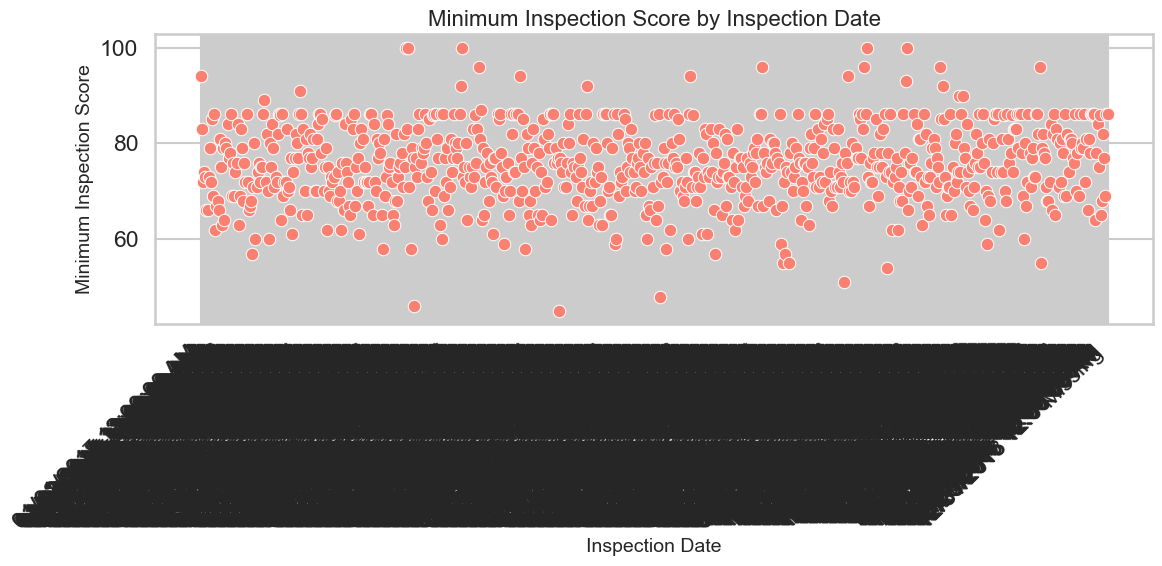

In [40]:
##Group By inspection_date with low Score

# Selecting rows with minimum inspection score for each unique inspection date
min_inspection_scores = df.loc[df.groupby(['inspection_date'])['inspection_score'].idxmin()]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='inspection_date', y='inspection_score', data=min_inspection_scores, color='salmon')
plt.title('Minimum Inspection Score by Inspection Date', fontsize=16)
plt.xlabel('Inspection Date', fontsize=14)
plt.ylabel('Minimum Inspection Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Data Visualization: EDA

Using Methog Plotly¶

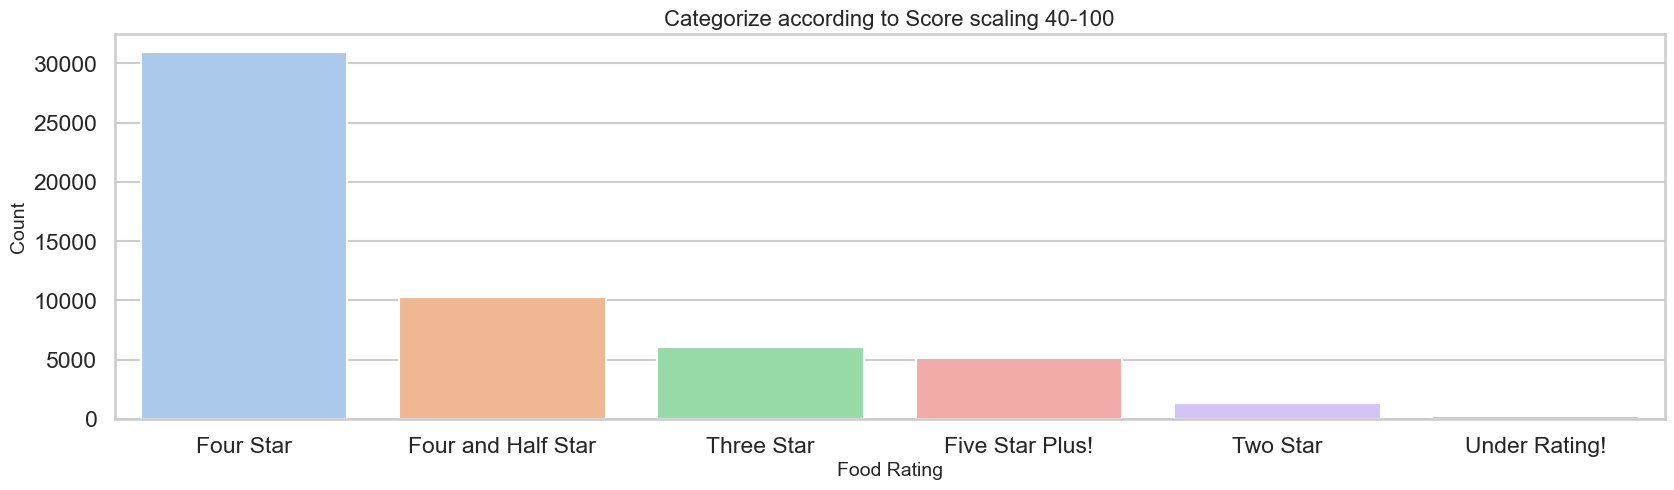

In [41]:
# Using Countplot For Rating, because we created it with value
#where Rating Sclae 40 to 100
plt.figure(figsize=(20, 5))
sns.countplot(x='food_rating',
              data=df,
              order=df['food_rating'].value_counts().index,
              palette='pastel')
plt.title("Categorize according to Score scaling 40-100", fontsize=16)
plt.xlabel('Food Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# We can conclude that Most of the Inspection have Four star
# Very Less Amount of Inspection are underrating
# Lost of Infectin details are missing

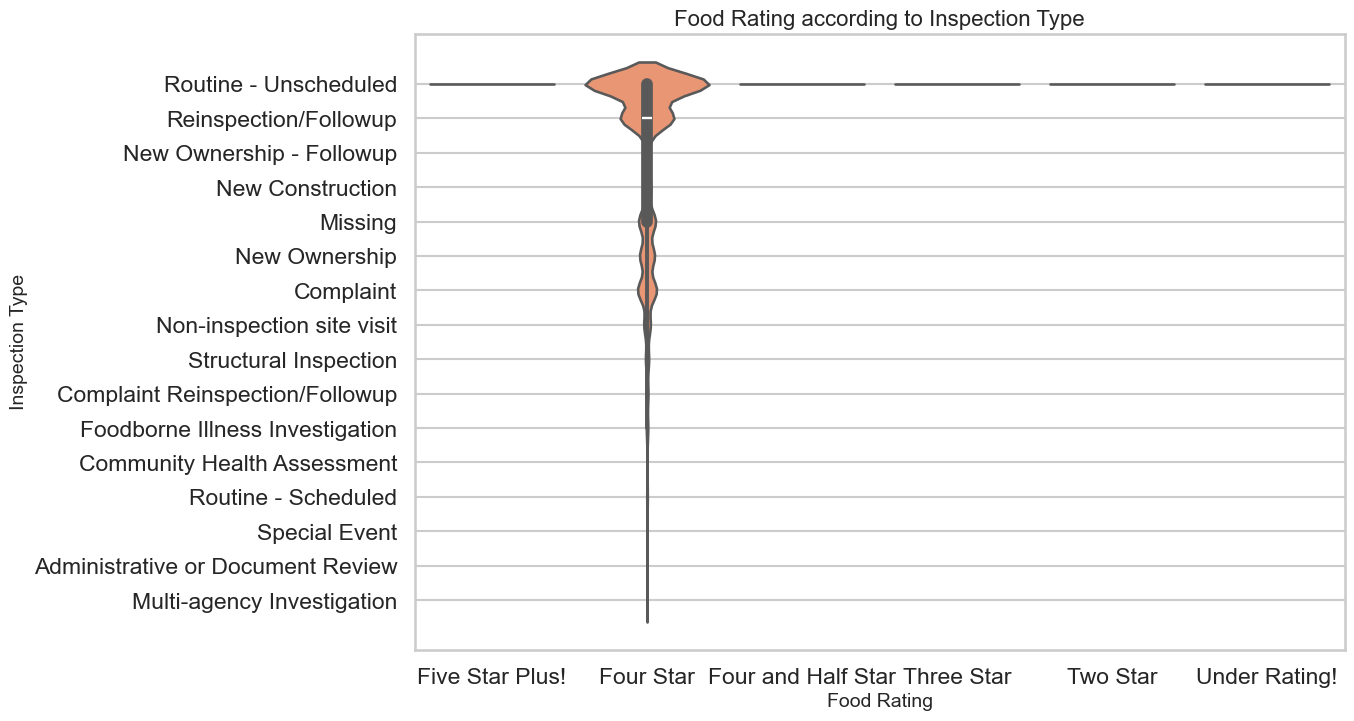

In [42]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='food_rating', y='inspection_type', data=df, palette='Set2')
plt.title('Food Rating according to Inspection Type', fontsize=16)
plt.xlabel('Food Rating', fontsize=14)
plt.ylabel('Inspection Type', fontsize=14)
plt.show()

##From the Plot we can conclude that most of the Inspection are done unscheduled also same time routine , the gall get four star Rating

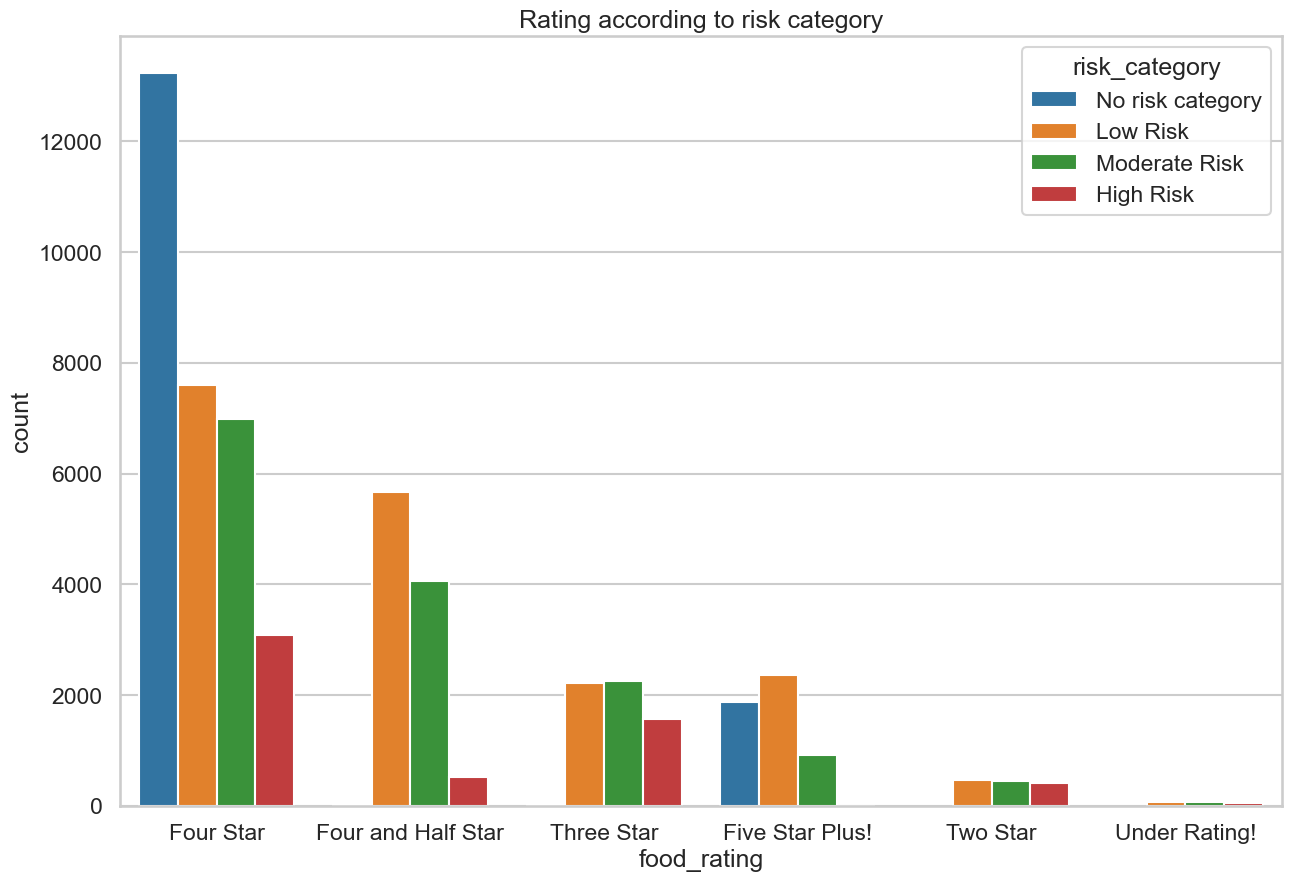

In [43]:
### Using method Barplot to See
## The Responce of the result
plt.figure(figsize=(15,10))
sns.countplot(x='food_rating', hue='risk_category', data=df, order=df['food_rating'].value_counts().index)
plt.title('Rating according to risk category')
plt.show()



In [44]:
df_numerics_only

['business_latitude',
 'business_longitude',
 'business_phone_number',
 'inspection_score',
 'neighborhoods',
 'sf_find_neighborhoods',
 'current_police_districts',
 'current_supervisor_districts',
 'analysis_neighborhoods']

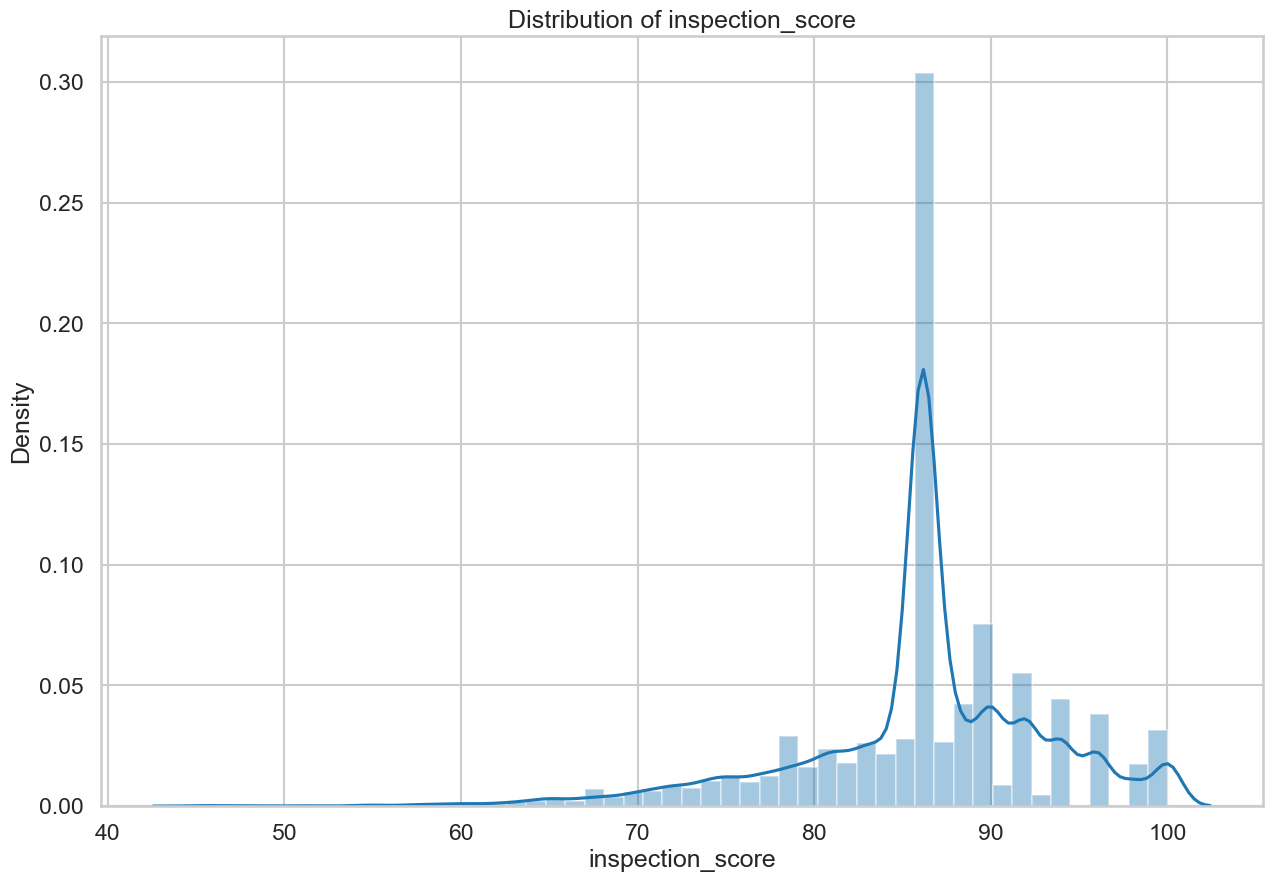

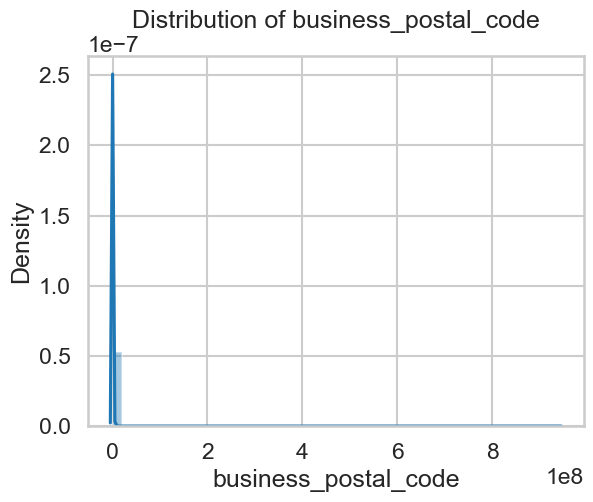

ValueError: could not convert string to float: 'Missing district'

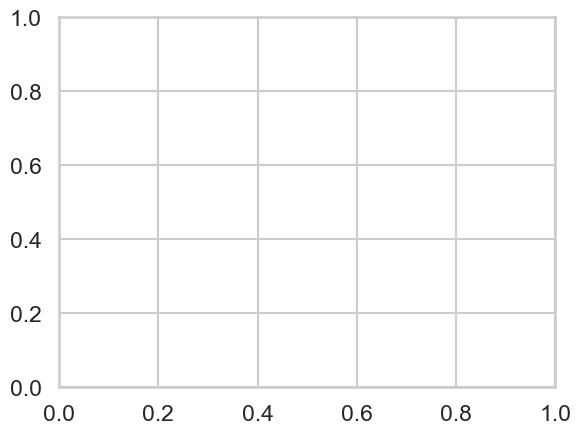

In [45]:

numeric_columns = ['inspection_score', 'business_postal_code', 'current_police_districts', 'current_supervisor_districts', 'analysis_neighborhoods']

# Plot the distribution of each numeric column
plt.figure(figsize=(15, 10))
for column in numeric_columns:
    sns.distplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


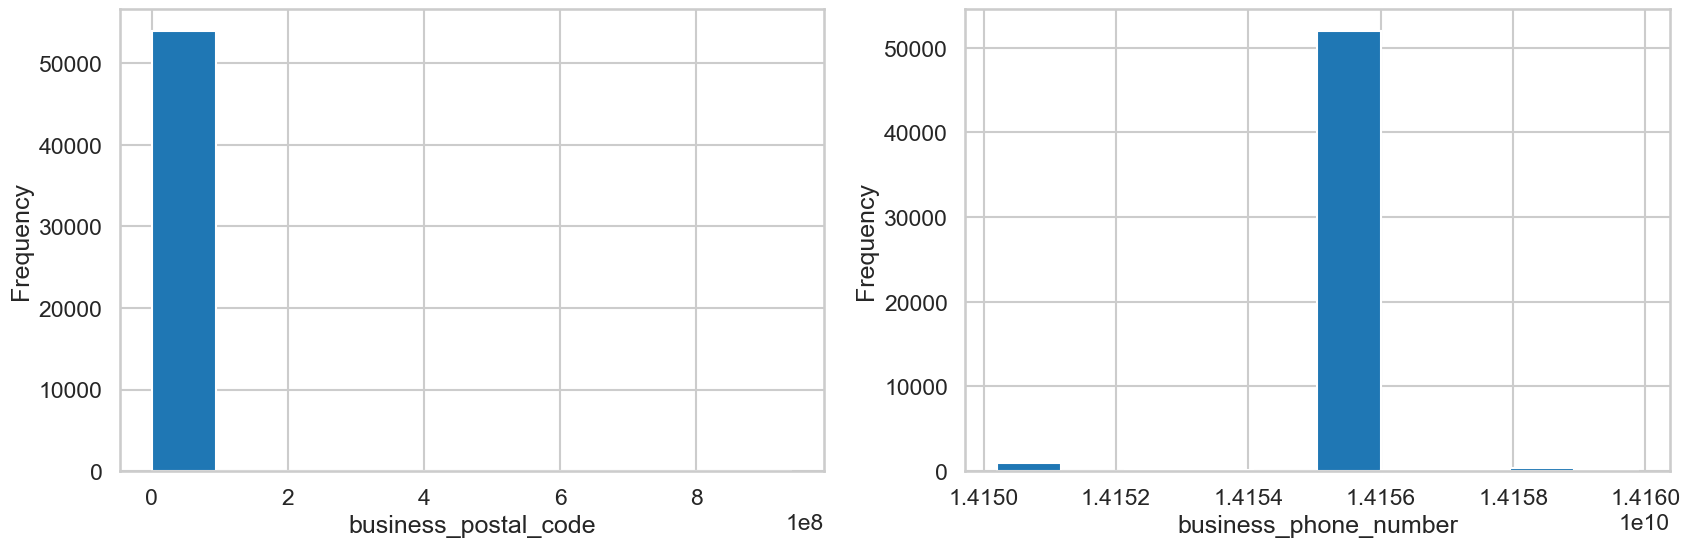

In [46]:


# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot histograms for numeric columns
axs[0].hist(df['business_postal_code'])
axs[0].set_xlabel("business_postal_code")
axs[0].set_ylabel("Frequency")

axs[1].hist(df['business_phone_number'])
axs[1].set_xlabel("business_phone_number")
axs[1].set_ylabel("Frequency")

# Show the plot
plt.show()


In [47]:
df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,food_rating,responce_result
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108.0,1.415578e+10,85936_20170925,09/25/2017 12:00:00 AM,100.000000,Routine - Unscheduled,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!,Yes
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134.0,1.415546e+10,5827_20170224,02/24/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,92.00000,92.00000,2.0,2.000000,7.000000,Four Star,Yes
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109.0,1.415542e+10,94910_20180530,05/30/2018 12:00:00 AM,86.157624,New Ownership - Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110.0,1.415542e+10,64667_20170814,08/14/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,53.00000,53.00000,3.0,2.000000,20.000000,Four Star,Yes
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133.0,1.415542e+10,97722_20181217,12/17/2018 12:00:00 AM,96.000000,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109.0,1.415530e+10,70220_20170913,09/13/2017 12:00:00 AM,86.157624,Complaint,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117.0,1.415584e+10,95021_20190228,02/28/2019 12:00:00 AM,92.000000,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,56.88226,56.88226,Missing district,5.628329,19.509135,Four and Half Star,Yes
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124.0,1.415542e+10,78289_20161209,12/09/2016 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133.0,1.415582e+10,100887_20190814,08/14/2019 12:00:00 AM,86.157624,New Ownership - Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes


In [48]:
#sns.pairplot(df)

In [49]:
columns = 'inspection_type', 'risk_category', 'business_city'	

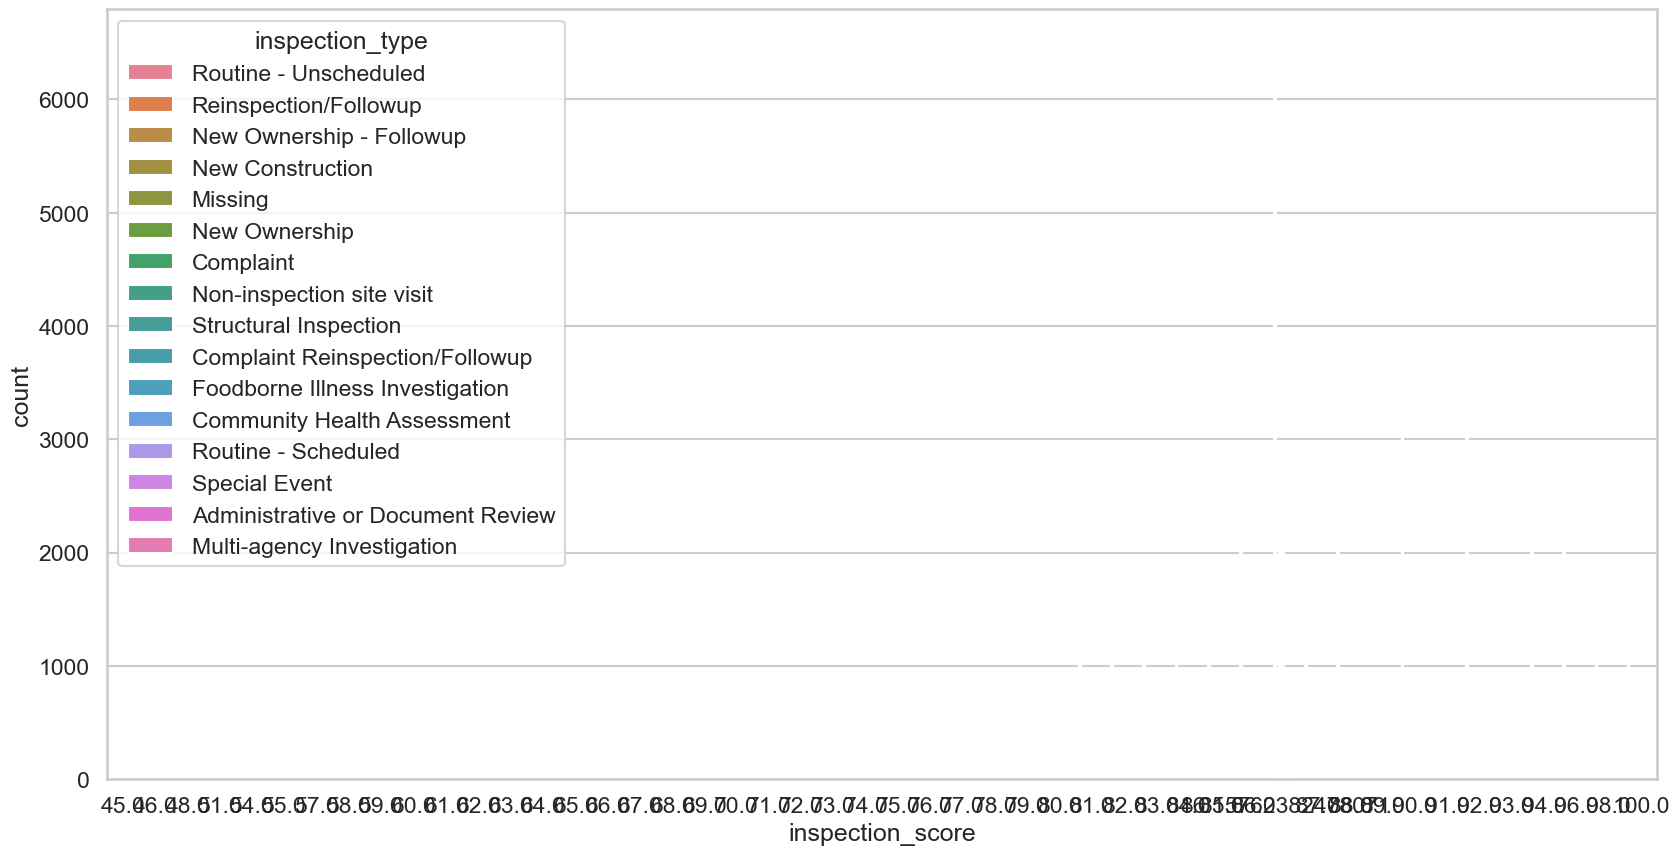

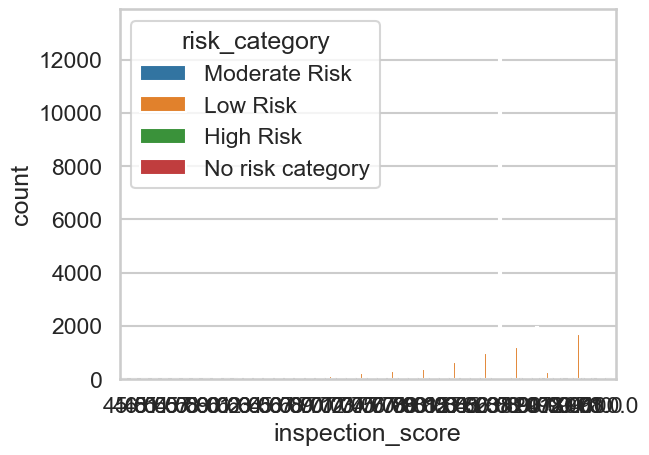

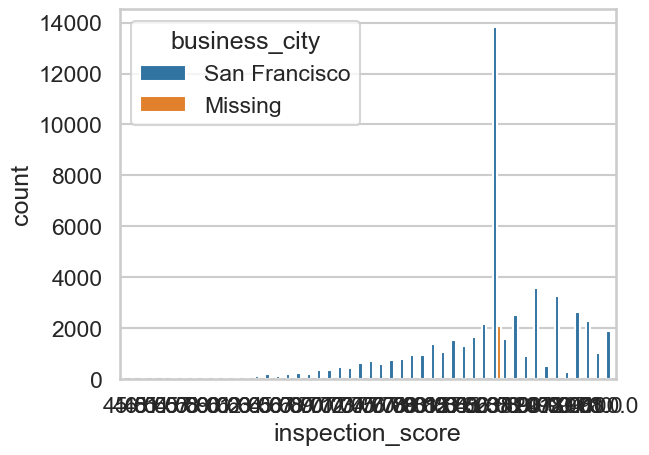

In [50]:
# Define the size of the figure
plt.figure(figsize=(20, 10))

# Loop through each column and create a countplot
for col in columns:
    sns.countplot(x="inspection_score", hue=col, data=df)
    plt.show()

Let's check for correlations

First we put the data into a correlation matrix

Then we plot the heatmap from seaborn

In [51]:
# Selecting only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_data = df[numeric_columns]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix


,business_postal_code,business_phone_number,inspection_score,neighborhoods,sf_find_neighborhoods,current_supervisor_districts,analysis_neighborhoods
business_postal_code,1.000000,0.002618,0.012342,-0.001440,-0.001440,-0.013644,0.000532
business_phone_number,0.002618,1.000000,-0.027048,-0.009218,-0.009218,0.007323,-0.007812
inspection_score,0.012342,-0.027048,1.000000,0.002500,0.002500,0.032210,0.014842
neighborhoods,-0.001440,-0.009218,0.002500,1.000000,1.000000,-0.220205,-0.199424
sf_find_neighborhoods,-0.001440,-0.009218,0.002500,1.000000,1.000000,-0.220205,-0.199424
current_supervisor_districts,-0.013644,0.007323,0.032210,-0.220205,-0.220205,1.000000,0.198219
analysis_neighborhoods,0.000532,-0.007812,0.014842,-0.199424,-0.199424,0.198219,1.000000


In [52]:

correlation_matrix = numeric_data.corr().abs()
correlation_matrix


,business_postal_code,business_phone_number,inspection_score,neighborhoods,sf_find_neighborhoods,current_supervisor_districts,analysis_neighborhoods
business_postal_code,1.000000,0.002618,0.012342,0.001440,0.001440,0.013644,0.000532
business_phone_number,0.002618,1.000000,0.027048,0.009218,0.009218,0.007323,0.007812
inspection_score,0.012342,0.027048,1.000000,0.002500,0.002500,0.032210,0.014842
neighborhoods,0.001440,0.009218,0.002500,1.000000,1.000000,0.220205,0.199424
sf_find_neighborhoods,0.001440,0.009218,0.002500,1.000000,1.000000,0.220205,0.199424
current_supervisor_districts,0.013644,0.007323,0.032210,0.220205,0.220205,1.000000,0.198219
analysis_neighborhoods,0.000532,0.007812,0.014842,0.199424,0.199424,0.198219,1.000000


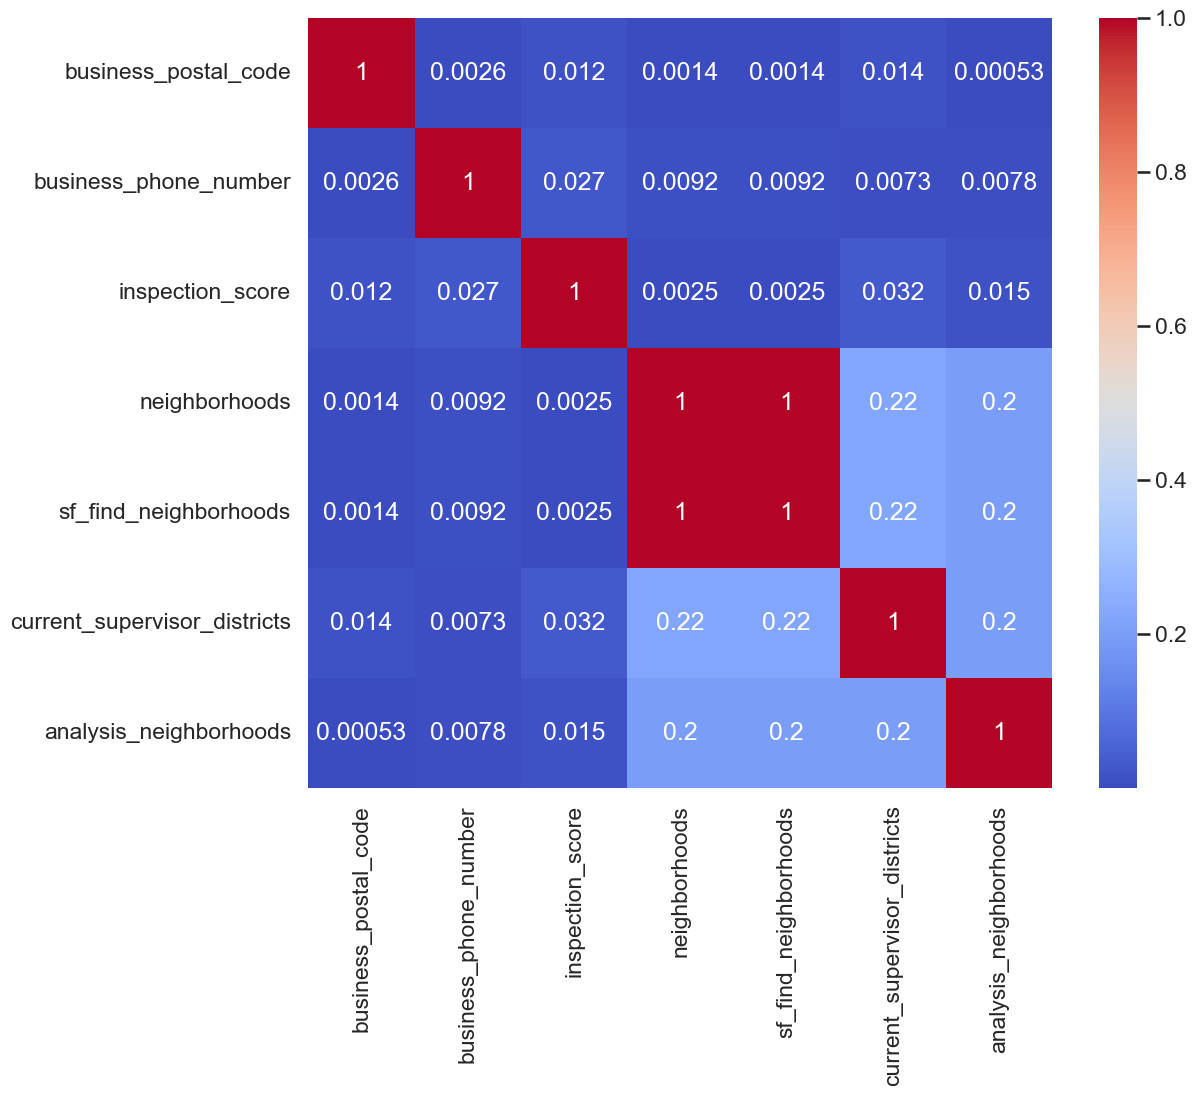

In [53]:
plt.figure(figsize=(12, 10))  # Adjust the figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


We have Completed the First Part of The Data Visualisation, 

now Fun started going Deep For the Second Part where we are going for prediction using different methods.

#lab-predictions-logistic-regression

In [54]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,business_id,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type,violation_description,risk_category,current_police_districts,food_rating,responce_result
0,85936,Laurel Court,950 Mason St,San Francisco,CA,85936_20170925,09/25/2017 12:00:00 AM,Routine - Unscheduled,Missing description,No risk category,Missing district,Five Star Plus!,Yes
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,5827_20170224,02/24/2017 12:00:00 AM,Reinspection/Followup,Missing description,No risk category,2.0,Four Star,Yes
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94910_20180530,05/30/2018 12:00:00 AM,New Ownership - Followup,Missing description,No risk category,Missing district,Four Star,Yes
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,64667_20170814,08/14/2017 12:00:00 AM,Reinspection/Followup,Missing description,No risk category,3.0,Four Star,Yes
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,97722_20181217,12/17/2018 12:00:00 AM,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,Missing district,Five Star Plus!,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,70220_20170913,09/13/2017 12:00:00 AM,Complaint,Missing description,No risk category,Missing district,Four Star,Yes
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,95021_20190228,02/28/2019 12:00:00 AM,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Missing district,Four and Half Star,Yes
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,78289_20161209,12/09/2016 12:00:00 AM,Reinspection/Followup,Missing description,No risk category,Missing district,Four Star,Yes
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,100887_20190814,08/14/2019 12:00:00 AM,New Ownership - Followup,Missing description,No risk category,Missing district,Four Star,Yes


In [55]:
#for col in categorical_columns.columns:
  #sns.barplot(x=categorical_columns[col], y=df["inspection_score"])
 # plt.xticks(rotation=90)
  #plt.show()

In [56]:
for col in categorical_columns.columns:
    print(categorical_columns[col].value_counts())
    print("/")

business_id
19373                                                                                                                                                                                                                                                                                                      45
90238                                                                                                                                                                                                                                                                                                      42
67564                                                                                                                                                                                                                                                                                                      41
61494                                                                             

In [57]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,food_rating,responce_result
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108.0,1.415578e+10,85936_20170925,09/25/2017 12:00:00 AM,100.000000,Routine - Unscheduled,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!,Yes
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134.0,1.415546e+10,5827_20170224,02/24/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,92.00000,92.00000,2.0,2.000000,7.000000,Four Star,Yes
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109.0,1.415542e+10,94910_20180530,05/30/2018 12:00:00 AM,86.157624,New Ownership - Followup,Missing description,No risk category,56.88226,56.88226,Missing district,5.628329,19.509135,Four Star,Yes
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110.0,1.415542e+10,64667_20170814,08/14/2017 12:00:00 AM,86.157624,Reinspection/Followup,Missing description,No risk category,53.00000,53.00000,3.0,2.000000,20.000000,Four Star,Yes
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133.0,1.415542e+10,97722_20181217,12/17/2018 12:00:00 AM,96.000000,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,56.88226,56.88226,Missing district,5.628329,19.509135,Five Star Plus!,Yes


In [58]:
df.describe()

,business_postal_code,business_phone_number,inspection_score,neighborhoods,sf_find_neighborhoods,current_supervisor_districts,analysis_neighborhoods
count,5.397300e+04,5.397300e+04,53973.000000,53973.000000,53973.000000,53973.000000,53973.000000
mean,3.167294e+05,1.415542e+10,86.157624,56.882260,56.882260,5.628329,19.509135
std,1.402927e+07,7.668829e+05,7.123790,24.335301,24.335301,2.310341,8.134329
min,0.000000e+00,1.415020e+10,45.000000,1.000000,1.000000,1.000000,1.000000
25%,9.410700e+04,1.415542e+10,84.000000,53.000000,53.000000,5.000000,19.509135
50%,9.411200e+04,1.415542e+10,86.157624,56.882260,56.882260,5.628329,19.509135
75%,9.412200e+04,1.415542e+10,90.000000,56.882260,56.882260,5.628329,20.000000
max,9.411020e+08,1.415988e+10,100.000000,117.000000,117.000000,11.000000,41.000000


In [59]:
df.isna().sum()

business_id                     0
business_name                   0
business_address                0
business_city                   0
business_state                  0
business_postal_code            0
business_phone_number           0
inspection_id                   0
inspection_date                 0
inspection_score                0
inspection_type                 0
violation_description           0
risk_category                   0
neighborhoods                   0
sf_find_neighborhoods           0
current_police_districts        0
current_supervisor_districts    0
analysis_neighborhoods          0
food_rating                     0
responce_result                 0
dtype: int64

In [60]:
columns =('business_postal_code','business_phone_number','inspection_score','neighborhoods','sf_find_neighborhoods','current_supervisor_districts','analysis_neighborhoods')

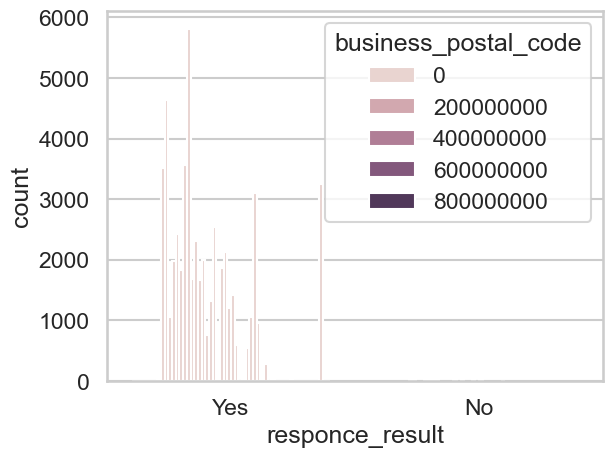

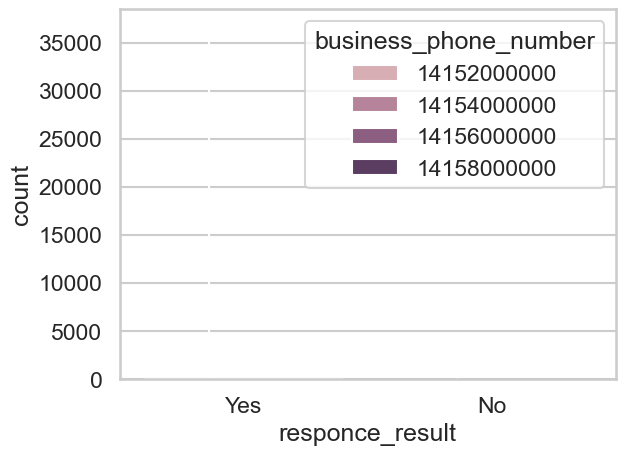

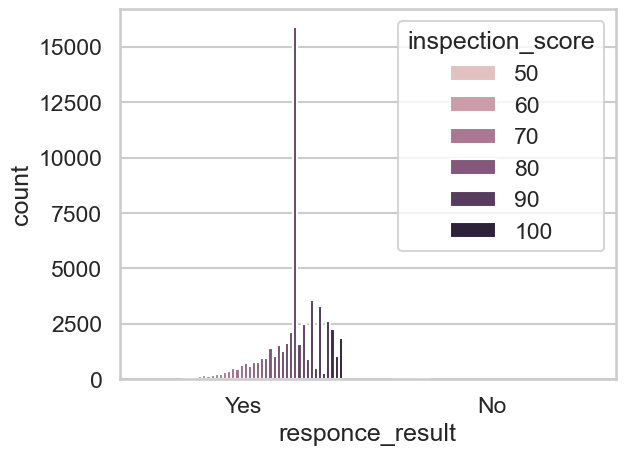

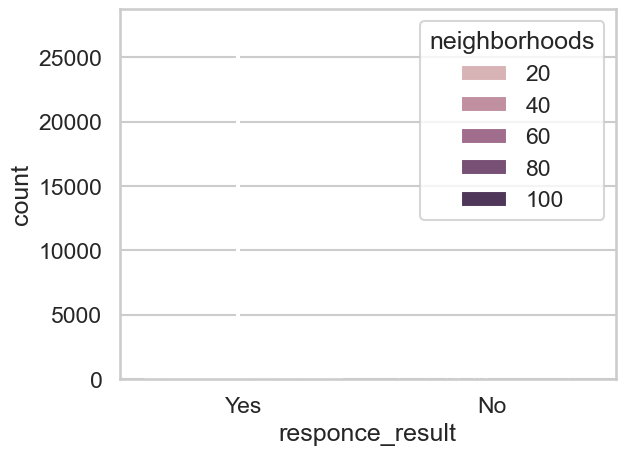

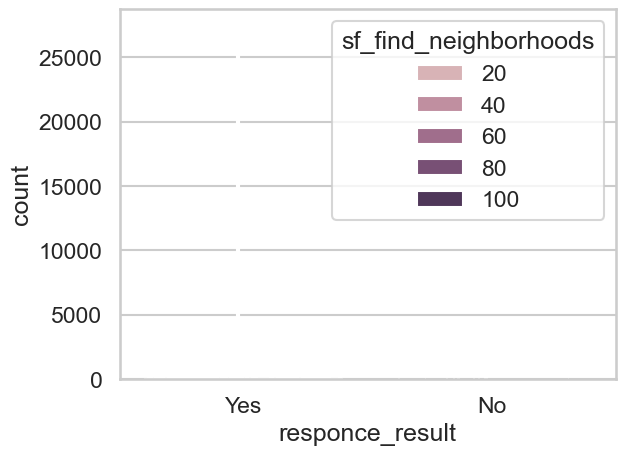

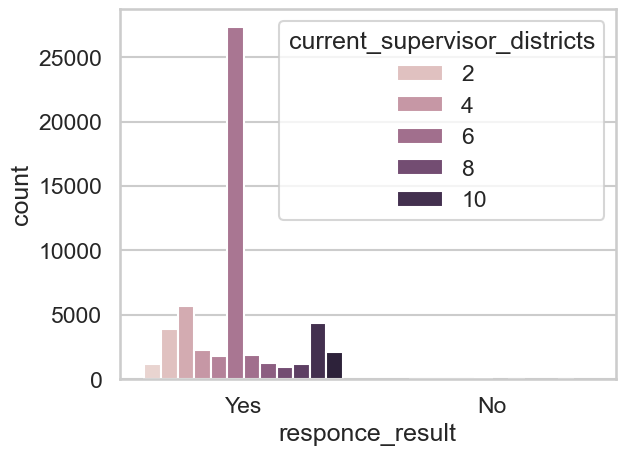

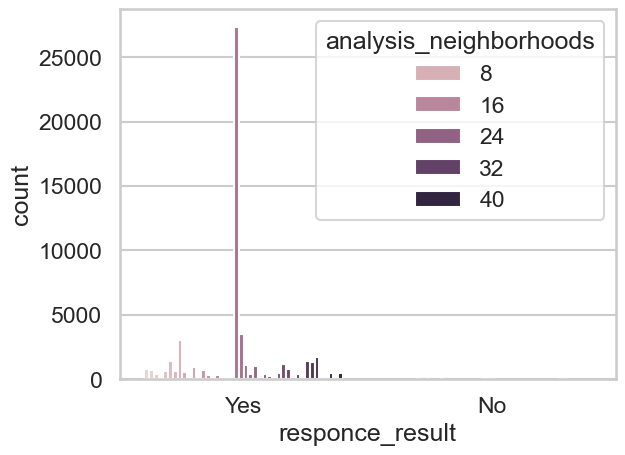

In [61]:
for col in columns:
        sns.countplot(x="responce_result", hue=col, data=df)
        plt.show()

According To lab-imbalanced-data

In [62]:
df.responce_result.value_counts()

responce_result
Yes    53761
No       212
Name: count, dtype: int64

In [63]:
X = df[['business_postal_code','business_phone_number','inspection_score','neighborhoods','sf_find_neighborhoods','current_supervisor_districts','analysis_neighborhoods']]
y = df['responce_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


I think it is rear case that we get 1 , it seems to be Model fited perfectly .

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preprocessing step: Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = X_train_processed.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X_train_processed[column] = label_encoder.fit_transform(X_train_processed[column])
    X_test_processed[column] = label_encoder.transform(X_test_processed[column])

# Preprocessing step: Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_processed)
X_test_imputed = imputer.transform(X_test_processed)

# Initialize RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Fit the model
classifier.fit(X_train_imputed, y_train)

# Make predictions
predictions = classifier.predict(X_test_imputed)

# Evaluate the model
print(classification_report(y_test, predictions))


NameError: name 'X_train_processed' is not defined

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Extract numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Select features and target
X = df[numeric_columns]
y = df['responce_result']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression classifier
classifier = LogisticRegression(random_state=42, max_iter=10000)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00        42
         Yes       1.00      1.00      1.00     10753

    accuracy                           1.00     10795
   macro avg       1.00      1.00      1.00     10795
weighted avg       1.00      1.00      1.00     10795



In [67]:
# Confusion matrix
num_columns = numerical.shape[1]
tick_labels = numerical.columns

f = plt.figure(figsize=(19, 15))
plt.matshow(numerical.corr(), fignum=f.number)
plt.xticks(range(num_columns), tick_labels, fontsize=14, rotation=45)
plt.yticks(range(num_columns), tick_labels, fontsize=14)
plt.colorbar()
plt.show()



NameError: name 'numerical' is not defined

In [68]:

num_columns = numerical.shape[1]
tick_labels = numerical.columns
f = plt.figure(figsize=(19, 15))
plt.matshow(numerical.corr(), fignum=f.number)
plt.xticks(range(num_columns), tick_labels, fontsize=14, rotation=45)
plt.yticks(range(num_columns), tick_labels, fontsize=14)
plt.colorbar()
plt.show()


NameError: name 'numerical' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)


In [ ]:
print(X_resampled_df)

In [ ]:
y_resampled_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

In [ ]:
from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
